In [1]:
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from src.utils.io import load_pickle

In [6]:
train = pl.read_csv("../data/raw/train.csv")
train_reversed = pl.read_parquet(
    "../data/preprocessing/train_reversed.parquet"
)

oof_lgbm = load_pickle("../data/train/lgbm/seed=42/oof.pkl")
oof_cat = load_pickle("../data/train/cat/seed=42/oof.pkl")
oof = load_pickle("../data/ensemble/oof.pkl")

In [7]:
oof.min(), oof.max()

(-1.0, 1.0)

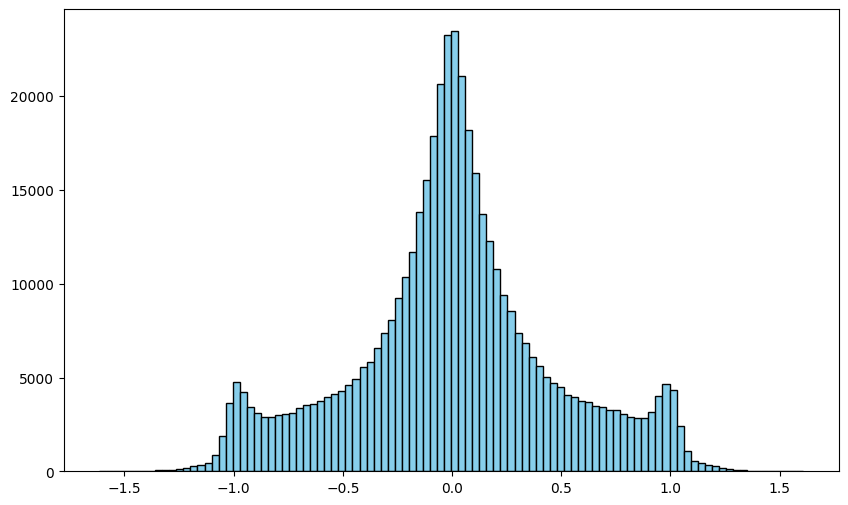

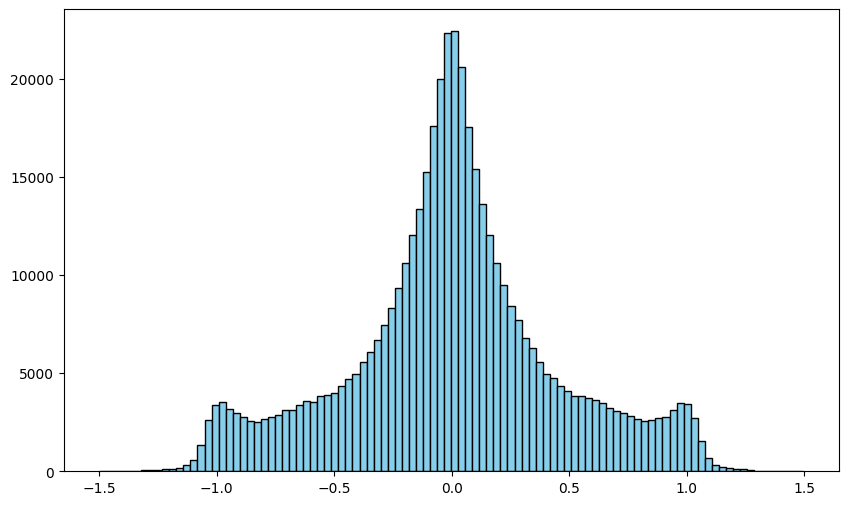

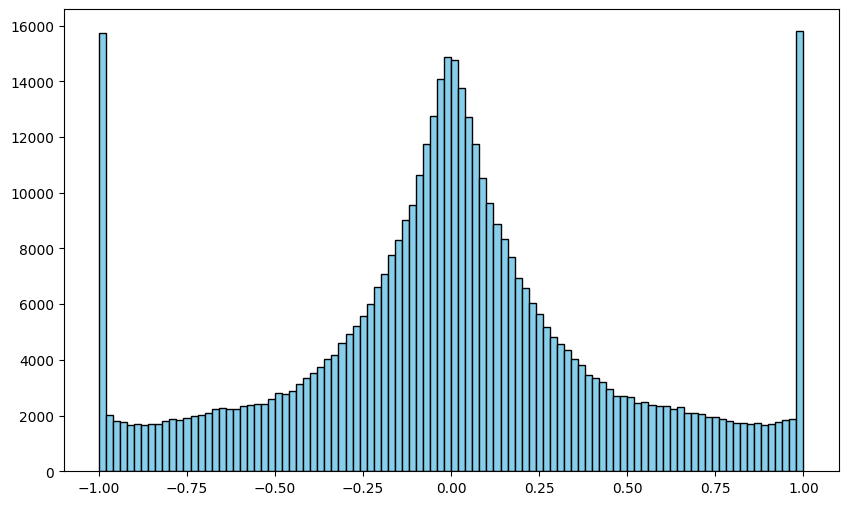

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(oof_lgbm, bins=100, color="skyblue", edgecolor="black")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(oof_cat, bins=100, color="skyblue", edgecolor="black")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(oof, bins=100, color="skyblue", edgecolor="black")
plt.show()

<Axes: >

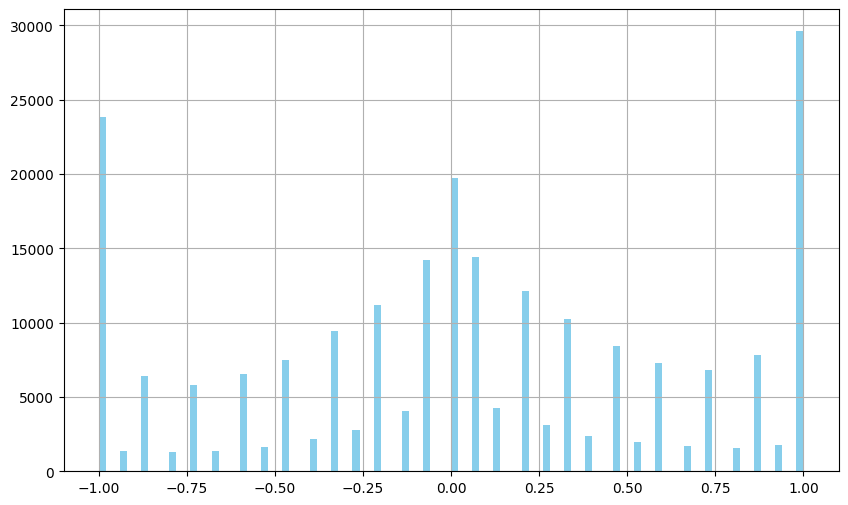

In [9]:
train["utility_agent1"].to_pandas().hist(
    bins=100, color="skyblue", figsize=(10, 6)
)

<Axes: >

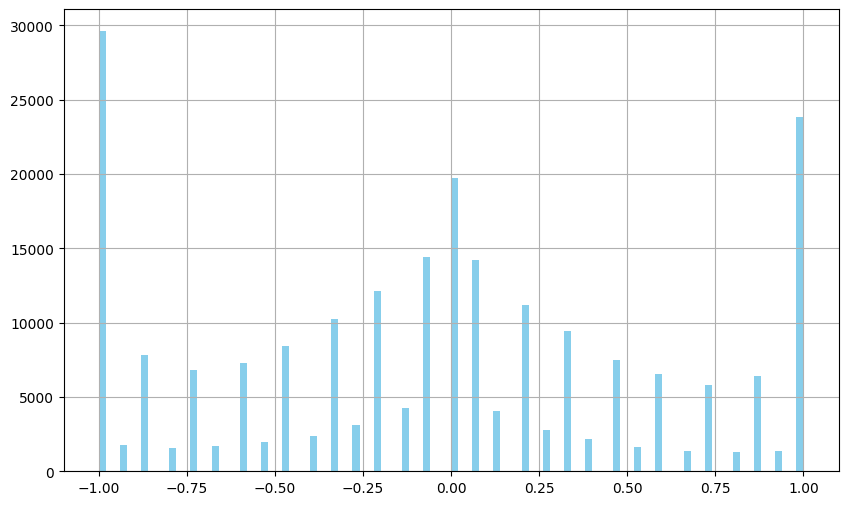

In [6]:
train_reversed["utility_agent1"].to_pandas().hist(
    bins=100, color="skyblue", figsize=(10, 6)
)

## Round prediction with a utility_agent1 of train

In [19]:
df_round = (
    train["utility_agent1"]
    .value_counts()
    .filter(pl.col("count") > 0)
    .sort("utility_agent1")
    .to_pandas()
)

In [20]:
def round_to_nearest(value, df):
    closest = df.iloc[(df["utility_agent1"] - value).abs().argsort()[:1]]
    return closest["utility_agent1"].values[0]


oof_rounded = np.array([round_to_nearest(x, df_round) for x in oof])

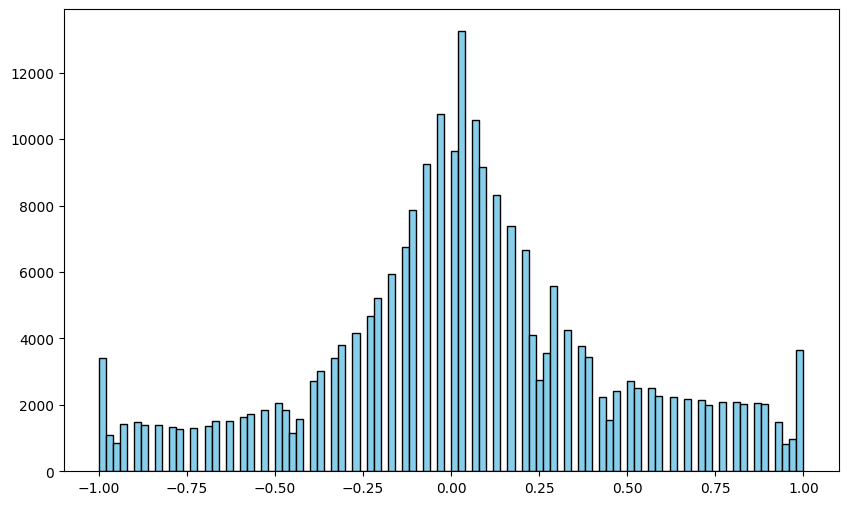

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(oof_rounded, bins=100, color="skyblue", edgecolor="black")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

target = train["utility_agent1"].to_numpy()
score = mean_squared_error(target, oof_rounded, squared=False)
print(f"RMSE: {score}")

RMSE: 0.42629564680192095
